In [36]:
import pandas as pd
import numpy as np
sp = pd.read_csv(r"C:\Users\Divya DJ\Downloads\spotify_dataset.csv")
top = pd.read_excel(r"C:\Users\Divya DJ\Downloads\top10.xlsx")
top.dropna(inplace = True)
sp.dropna(inplace = True)
spc = sp[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness','Liveness', 'Valence']]
spc = spc.apply(pd.to_numeric,errors = 'coerce')
spc = spc[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness','Liveness', 'Valence']].astype(float)
topc = top[[ 'dnce', 'nrgy', 'dB','spch', 'acous', 'live', 'val']]
sp.drop(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness','Liveness', 'Valence'],axis = 1,inplace = True)
top.drop([ 'dnce', 'nrgy', 'dB','spch', 'acous', 'live', 'val'],axis = 1,inplace = True)
for i in topc[[ 'dnce', 'nrgy','spch', 'acous', 'live', 'val']]:
    topc[i] = topc[i] / topc[i].abs().max()
sp['Song Name'] = sp['Song Name'].str.lower()
top['title'] = top['title'].str.lower()
sp['Artist'] = sp['Artist'].str.lower()
top['artist'] = top['artist'].str.lower()
top.fillna('0',inplace = True)
print(topc.shape,spc.shape)

C:\Users\Divya DJ\AppData\Local\Temp\ipykernel_10564\3542614056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topc[i] = topc[i] / topc[i].abs().max()


(603, 7) (1556, 7)


In [58]:
print("This song recommender works for all popular english songs from 2010 to 2019")
song = str(input("Enter a song name you listen:"))
artist = str(input("Your favourite artist:"))
genre = str(input("Genre you like:"))
genre = genre.lower()
artist = artist.lower()
song = song.lower()
s = sp[sp['Artist'] == artist].sort_values(by = ['Streams'],ascending = False)
if(len(s.index) < 3):
    spp = s.head(len(s.index))
else:
    spp = s.head(3)
s = sp[sp['Genre'].str.contains(genre)].sort_values(by = ['Streams'],ascending = False)
if(len(s.index) < 3):
    spp = spp.append(s.head(len(s.index)))
else:
    spp = spp.append(s.head(3))   
s =  top[top['artist'] == artist]
if(len(s.index) < 3):
    topp = s.sample(len(s.index))
else:
    topp = s.sample(3)  
s = top[top['top genre'].str.contains(genre)]
if(len(s.index) < 3):
    topp = topp.append(s.sample(len(s.index)))
else:
     topp = topp.append(s.sample(3))           
spp = spp.sort_values(by=['Streams'],ascending = False)
e = 0
if((len(spp.index) == 0) or (len(topp.index) == 0)):
    print("Give genre and artist as per the constraints!")
    e = 1

This song recommender works for all popular english songs from 2010 to 2019
Enter a song name you listen:dusk till dawn
Your favourite artist:zayn
Genre you like:hip hop


C:\Users\Divya DJ\AppData\Local\Temp\ipykernel_10564\1838453555.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spp = spp.append(s.head(3))
C:\Users\Divya DJ\AppData\Local\Temp\ipykernel_10564\1838453555.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topp = topp.append(s.sample(3))


In [59]:
a = sp[sp['Song Name'] == (song)].index
b = top[top['title'] == (song)].index
spcp = []
topcp = []
if(len(a)):
    spcp = list(spc.loc[a[0]])
elif(e == 0): 
    spcp = spc.loc[spp.index]
    spcp = list(spcp.mean())
if(len(b)):
    topcp = list(topc.loc[b[0]])
elif(e == 0):    
    topcp = topc.loc[topp.index]
    topcp = list(topcp.mean())    
if((len(spcp) == 0 or len(topcp) == 0) and (e == 1)):
    print("Provide valid song name also!")
    exit()
print(spcp,topcp)    

[0.6268, 0.6305999999999999, -5.7942, 0.2392, 0.29766, 0.209, 0.49354] [0.7044673539518901, 0.70578231292517, -5.333333333333333, 0.18055555555555558, 0.1447811447811448, 0.2725225225225225, 0.3707482993197279]


In [60]:
import random
def mink_dis(a,b,p = 1):
    dim = len(a)
    dis = 0
    for d in range(dim):
        dis += abs(a[d] - b[d])**p
    dis = dis**(1/p)
    return dis
dist = []
for i in spc.index:
    dist.append(mink_dis(spcp,spc.iloc[i]))
spc_dists = pd.DataFrame(data=dist,index=spc.index,columns=['dist'])
spc_dists = spc_dists.sort_values(by=['dist'],axis = 0)[2:4]
dist = []
for i in topc.index:
    dist.append(mink_dis(topcp,topc.iloc[i]))
topc_dists = pd.DataFrame(data=dist,index=topc.index,columns=['dist'])
topc_dists = topc_dists.sort_values(by=['dist'],axis = 0)[2:4]
sp_final = sp.loc[spc_dists.index]
top_final = top.loc[topc_dists.index]
print("songs you may like:")
l = []
if(len(spp.index) < 3):
    l.append(spp['Song Name'].head(len(spp.index)))
else:
    l.append(spp['Song Name'].head(3))
if(len(topp.index ) < 3):    
    l.append(random.sample(sorted(topp['title']),len(topp.index)))
else:
    l.append(random.sample(sorted(topp['title']),3))
l.append(list(sp_final['Song Name'].values))
l.append(list(top_final['title'].values))
for i in l:
    for j in i:
        print(j)

songs you may like:
time flies
hot wind blows (feat. lil wayne)
nicky jam: bzrp music sessions, vol. 41
pillowtalk
fancy
let me
i don't do drugs (feat. ariana grande)
jolie nana
living for love
wolves


print(spp[['Song Name','Artist','Genre']])
print(sp_final[['Song Name','Artist',"Genre"]])
print(topp[['title','artist','top genre']])
print(top_final[['title','artist','top genre']])


In [67]:
spp[['Song Name','Artist','Genre']].head(3)

,Song Name,Artist,Genre
1197,time flies,drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
257,hot wind blows (feat. lil wayne),"tyler, the creator","['hip hop', 'rap']"
50,"nicky jam: bzrp music sessions, vol. 41","bizarrap, nicky jam","['argentine hip hop', 'pop venezolano', 'trap ..."


In [63]:
sp_final[['Song Name','Artist',"Genre"]]

,Song Name,Artist,Genre
238,i don't do drugs (feat. ariana grande),doja cat,"['dance pop', 'pop']"
958,jolie nana,aya nakamura,"['basshall', 'francoton']"


In [66]:
topp[['title','artist','top genre']].head(3)

,title,artist,top genre
545,let me,zayn,dance pop
406,pillowtalk,zayn,dance pop
457,i don’t wanna live forever (fifty shades darker),zayn,dance pop


In [65]:
top_final[['title','artist','top genre']]

,title,artist,top genre
346,living for love,madonna,dance pop
516,wolves,selena gomez,dance pop


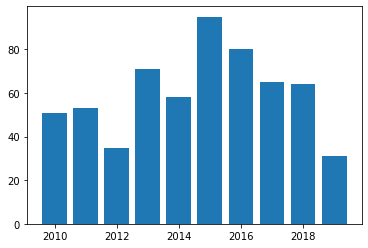

In [27]:
import matplotlib.pyplot as plt
p = top.value_counts('year').to_frame()
p = p.reset_index()
p.columns = ["year",'count']
plt.bar(p['year'],p['count'])
plt.show()

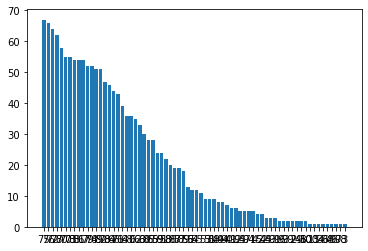

In [28]:
p = sp.value_counts('Popularity').to_frame()
p = p.reset_index()
p.columns = ["pop",'count']
plt.bar(p['pop'],p['count'])
plt.show()

In [75]:
new = pd.read_csv(r"C:\Users\Divya DJ\Desktop\DSP\archive\song_data.csv")
new.columns
song2 = input("Enter a song:")
song2 = song2.lower()
new['song_name'] = new['song_name'].str.lower()
new.drop(['Unnamed: 3',"Unnamed: 12"],axis = 1,inplace = True) 
newc = new[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','liveness', 'audio_valence']]
p = new[new["song_name"].str.contains(song2)].index
if (len(p) == 0):
    print("song not found")
point = list(newc.loc[p[0]])
point
dist = []
for i in newc.index:
    dist.append(mink_dis(point,newc.iloc[i]))
newc_dists = pd.DataFrame(data=dist,index=newc.index,columns=['dist'])
newc_dists = newc_dists.sort_values(by=['dist'],axis = 0)[1:4]
for i in newc_dists.index:
    print(new['song_name'].iloc[i])
  
    

Enter a song:love yourself
b5 [untitled] but i loved you
sophie
when you say nothing at all
